<a href="https://colab.research.google.com/github/aynaval/Hotel-booking-analysis_EDA/blob/main/EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KPIS for Hotel Industry**

---





1.   **RevPAR**

>Revenue per available room helps in evaluating the hotel’s operational performance. 

2.  **ALOS**

>The Average Length Of Stay 

>Calculated by dividing the occupied rooms by a number of bookings.

3. **Total Available Rooms**

>The number of rooms which are readily there to be booked in the hotel.

> Computed as sum of Available Rooms and also the number of Occupied Rooms.















In [417]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [418]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [419]:
data = pd.read_csv('/content/drive/MyDrive/Hotel booking analysis/Copy of Hotel Bookings.csv')

In [420]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [421]:
data.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [422]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [423]:
data.shape

(119390, 32)

In [424]:
data.size

3820480

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Columns and their meaning**
0. hotel 
>Hotel (H1 = Resort Hotel or H2 = City Hotel)

1. is_canceled
>Value indicating if the booking was canceled (1) or not (0)

2. lead_time
>Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

3. arrival_date_year
>Year of arrival date

4. arrival_date_month
>Month of arrival date

5. arrival_date_week_number
>Week number of year for arrival date

6. arrival_date_day_of_month
>Day of arrival date

7. stays_in_weekend_nights
>Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

8. stays_in_week_nights
>Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9. adults
>Number of adults

10. children
>Number of children

11. babies
>Number of babies

12. meal
>Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

13. country
>Country of origin. Categories are represented in the ISO 3155–3:2013 format

14. market_segment
>Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

15. distribution_channel
>Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16. is_repeated_guest
>Value indicating if the booking name was from a repeated guest (1) or not (0)

17. previous_cancellations
>Number of previous bookings that were cancelled by the customer prior to the current booking

18. previous_bookings_not_canceled
>Number of previous bookings not cancelled by the customer prior to the current booking

19. reserved_room_type
>Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20. assigned_room_type
>Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

21. booking_changes
>Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

22. deposit_type
>Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

23. agent
>ID of the travel agency that made the booking

24. company
>ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

25. days_in_waiting_list
>Number of days the booking was in the waiting list before it was confirmed to the customer

26. customer_type
>Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

27. adr
>Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28. required_car_parking_spaces
>Number of car parking spaces required by the customer

29. total_of_special_requests
>Number of special requests made by the customer (e.g. twin bed or high floor)

30. reservation_status
>Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

31. reservation_status_date
>Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel



In [426]:

for i in data.drop(['reservation_status_date','lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','previous_cancellations','previous_bookings_not_canceled','agent','company','days_in_waiting_list','adr'],axis = 1).columns:
  #print(i,data[i].unique() ,"\n")
  print(i, ": ")
  print(data[i].unique())
  print()
  print()
  

hotel : 
['Resort Hotel' 'City Hotel']


is_canceled : 
[0 1]


arrival_date_year : 
[2015 2016 2017]


arrival_date_month : 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


adults : 
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


children : 
[ 0.  1.  2. 10.  3. nan]


babies : 
[ 0  1  2 10  9]


meal : 
['BB' 'FB' 'HB' 'SC' 'Undefined']


country : 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB

In [427]:
for i in  data.drop(['reservation_status_date','lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','previous_cancellations','previous_bookings_not_canceled','agent','company','days_in_waiting_list','adr'],axis = 1).columns:
  print(i)
  print(data[i].value_counts())
  print()
  print()


hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64


arrival_date_year
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64


arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64


children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


babies
0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64


meal
BB           92310
HB           14463
SC 

# **Checking null values**

In [428]:
type(data.isnull().sum())
pd.concat([data.isnull().sum(),round(100*(data.isnull().sum()/len(data.index)),2)],axis=1,keys=['missing values','percent '])

,missing values,percent
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


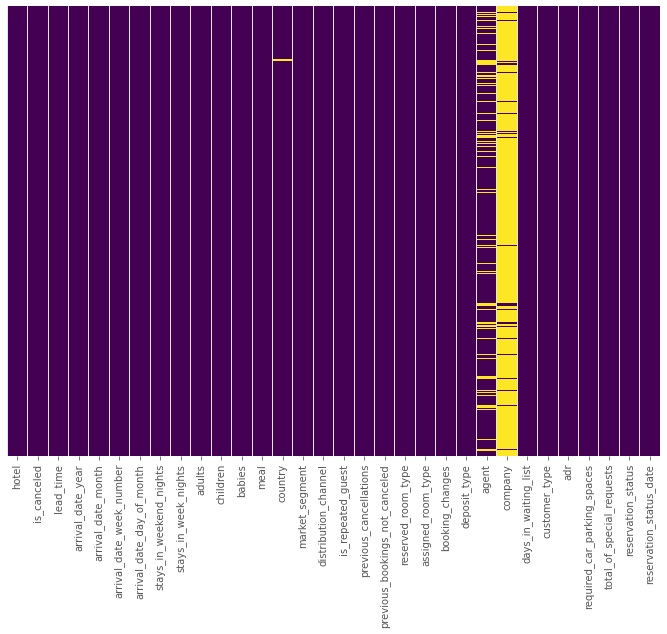

In [429]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')


# DEALING WITH NULL VALUES

## Dropping cols with highest missing values

In [430]:
 data['company'].count()

6797

In [431]:
data['agent'].count()

103050

In [432]:
# droping agent and company
data.drop(['agent','company'],axis = 1,inplace= True)
'agent' in data.columns or 'company' in data.columns

False

## Filling children missing values

In [433]:
# fill missing children value with 0 and change to int data type
data['children']= data['children'].fillna(0)
data['children']= data['children'].astype(int)
print(data['children'].isnull().sum())

0


## Fillng missing country values

In [434]:
data['country'].fillna('PRT',inplace=True)

In [435]:
data['country'].isnull().sum()

0

## Changing reservation status date to date data type from object

In [436]:
# changing reservation status date to date data type from object
print(data['reservation_status_date'].dtype)
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
print(data['reservation_status_date'].dtype)

object
datetime64[ns]


## Droping rows where adult, children and babies are 0

In [437]:
data= data.loc[~((data['adults']==0)&(data['children']==0)&(data['babies']==0))]

In [438]:
data.shape[0]

119210

# **Finding outliers**

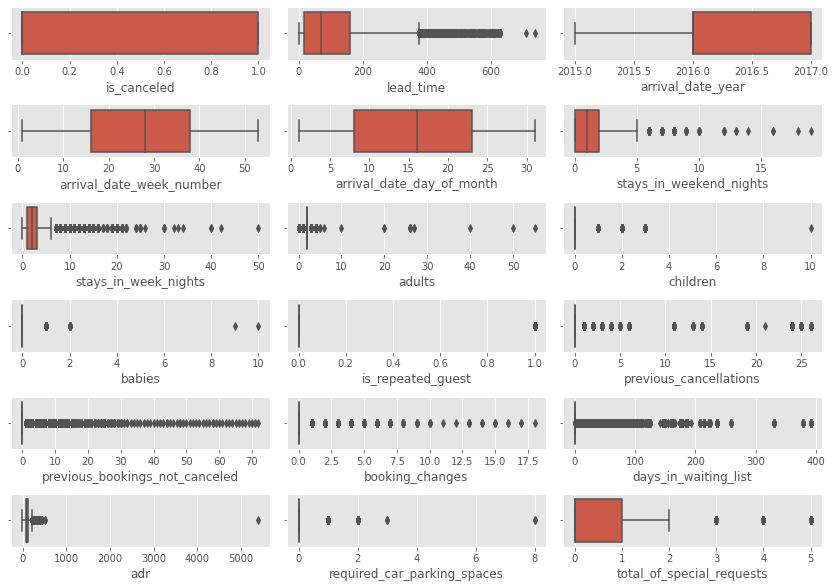

In [439]:
n=1
for i in range(data.shape[1]):
  if data.iloc[:,i].dtype == int or data.iloc[:,i].dtype== float:
    plt.subplot(6,3,n)
    sns.boxplot(data.iloc[:,i])
    n+=1
    
    plt.tight_layout();
    

From above figures it can be seen that lead_time, stay_in_week_nights,adults,children,babies,adr,required_car_parking_spaces and total_of_special_requests have outliers

### lead_time

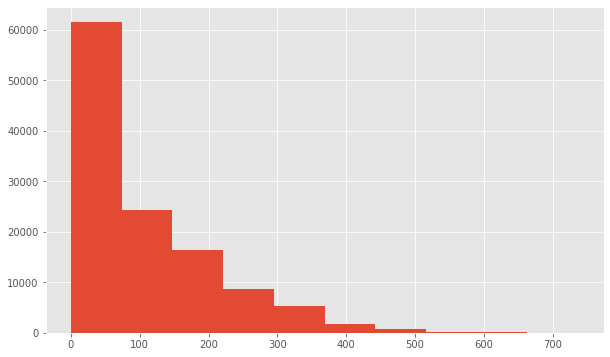

In [440]:

data['lead_time'].hist(figsize=(10, 6))

In [441]:
a = data['lead_time'].quantile(0.99)

In [442]:
data.loc[data['lead_time']> a,'lead_time' ]=500

### stays in week nights

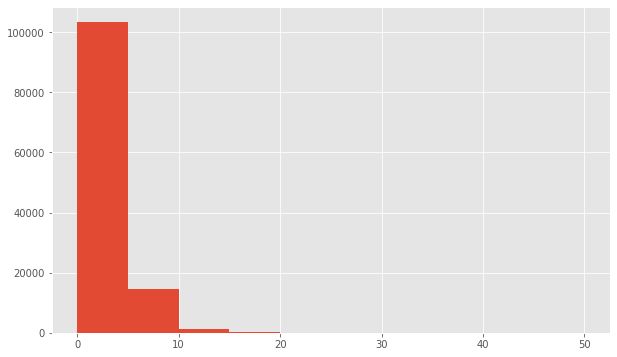

In [443]:
data['stays_in_week_nights'].hist(figsize=(10, 6))

In [444]:
data['stays_in_week_nights'].quantile(0.99)

10.0

In [445]:
data.loc[data['stays_in_week_nights']>data['stays_in_week_nights'].quantile(0.99),'stays_in_week_nights']= 10

### stays in weekend nights


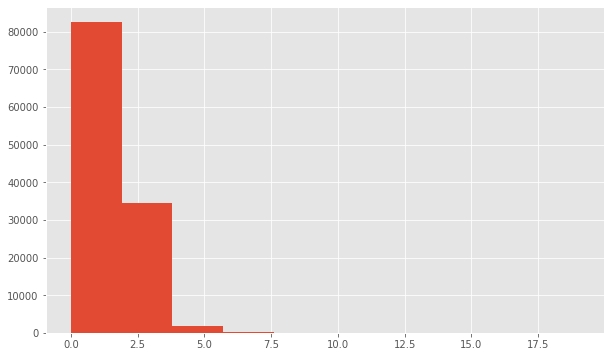

In [446]:
data['stays_in_weekend_nights'].hist(figsize=(10, 6))

In [447]:
data['stays_in_weekend_nights'].quantile(0.99)

4.0

In [448]:
data.loc[data['stays_in_weekend_nights']> data['stays_in_weekend_nights'].quantile(0.99),'stays_in_weekend_nights']=5

### adults

In [449]:
data['adults'].value_counts()

2     89680
1     23027
3      6202
0       223
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

### adults

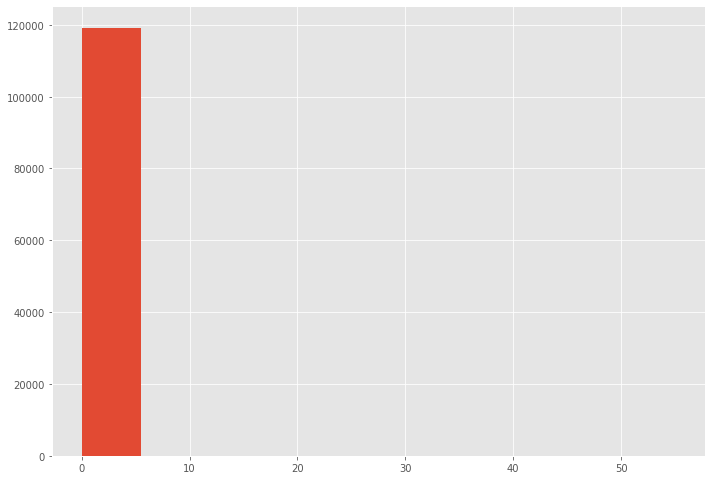

In [450]:
data['adults'].hist()

In [451]:
data.loc[data['adults']>4,'adults']=4

In [452]:
#data['days_in_waiting_list'].quantile(0.99)

In [453]:
#data[data['days_in_waiting_list']>300]['is_canceled'].hist()

### Children

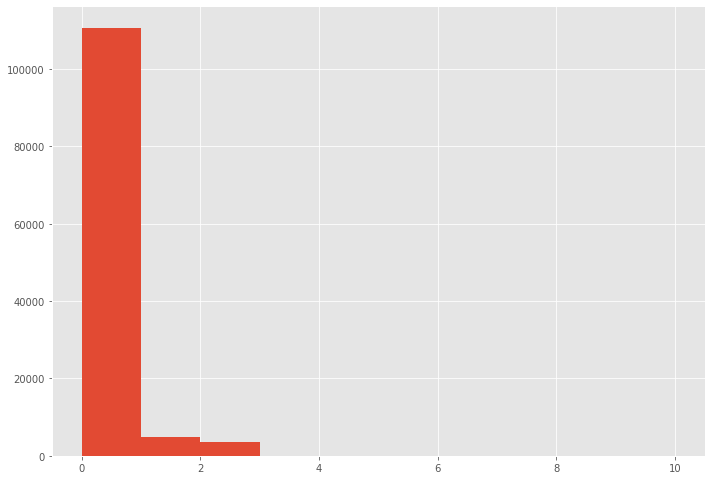

In [454]:
data['children'].hist()

In [455]:
data.loc[data['children']>5,'children']= 0

### Babies

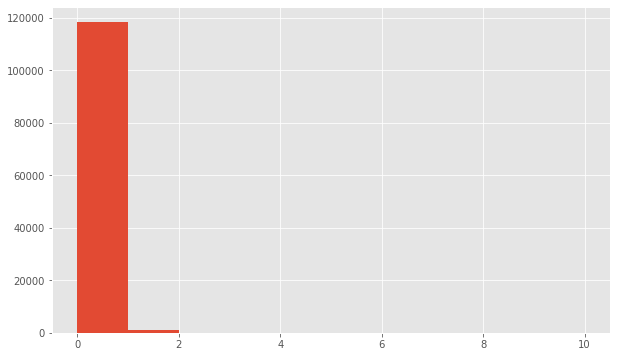

In [456]:
data['babies'].hist(figsize=(10,6))

In [457]:
data[data['babies']>8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


In [458]:
data.loc[data['babies']>8,'babies']=0

### adr

In [459]:
data.loc[data['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [460]:
data.loc[data['adr']>1000,'adr']=1000

### Required parking spaces

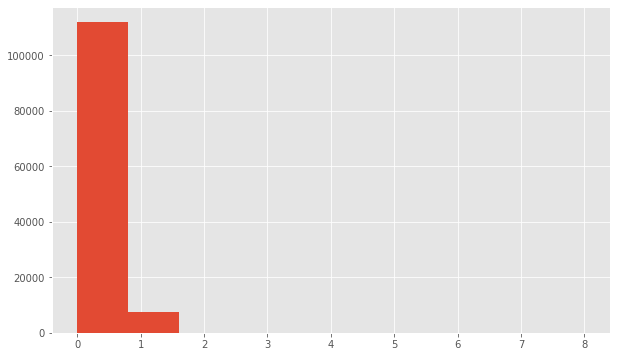

In [461]:
data['required_car_parking_spaces'].hist(figsize=(10,6))

In [462]:
data.loc[data['required_car_parking_spaces']>5,'required_car_parking_spaces']= 0

### total no. special requests

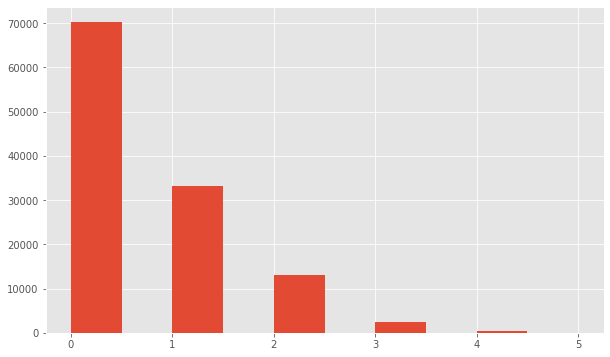

In [463]:
data['total_of_special_requests'].hist(figsize=(10,6))

In [464]:
data['total_of_special_requests'].quantile(0.99)

3.0

In [490]:
data.loc[data['total_of_special_requests']>4,'total_of_special_requests']=3

# **Univeriate analysis**

## How many City and Resort hotels are there?

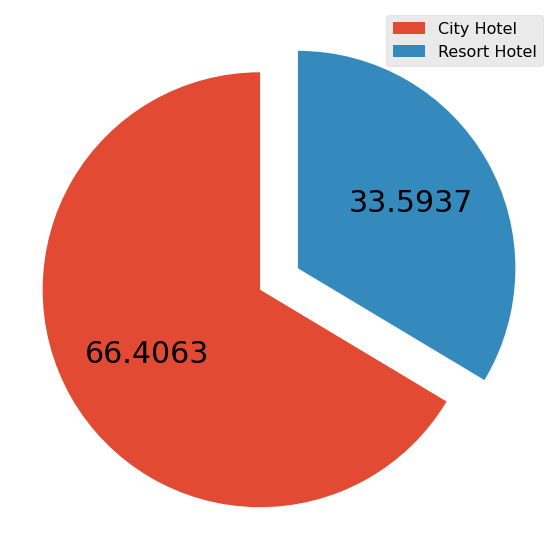

In [466]:
# Ratio of hotel types

fig, ax = plt.subplots(figsize=[10,10])
ax.pie(x=data['hotel'].value_counts().values,explode=[0.1,0.1],textprops={'fontsize': 30},startangle = 90,autopct='%.4f')
ax.legend(labels=data['hotel'].value_counts().index,loc=1,fontsize=16)
fig.show();

There are more City hotels than Resort hotels the reason could be there is more demand for city hotels.

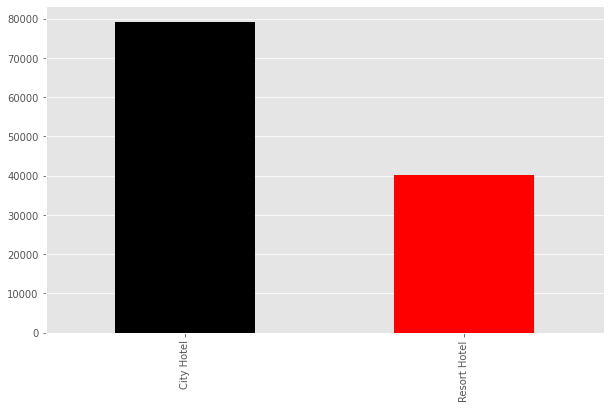

In [467]:
data['hotel'].value_counts().plot(kind ='bar',color=["black", "red"],figsize=(10, 6));
plt.grid(axis = 'x')



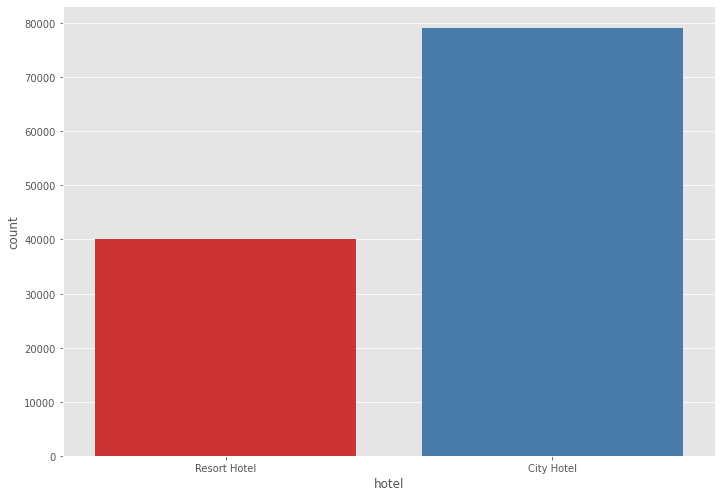

In [468]:

rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(data['hotel'],palette="Set1")

#  Did customer get reserved room type 

# How long do people stay at the hotels per market segment?

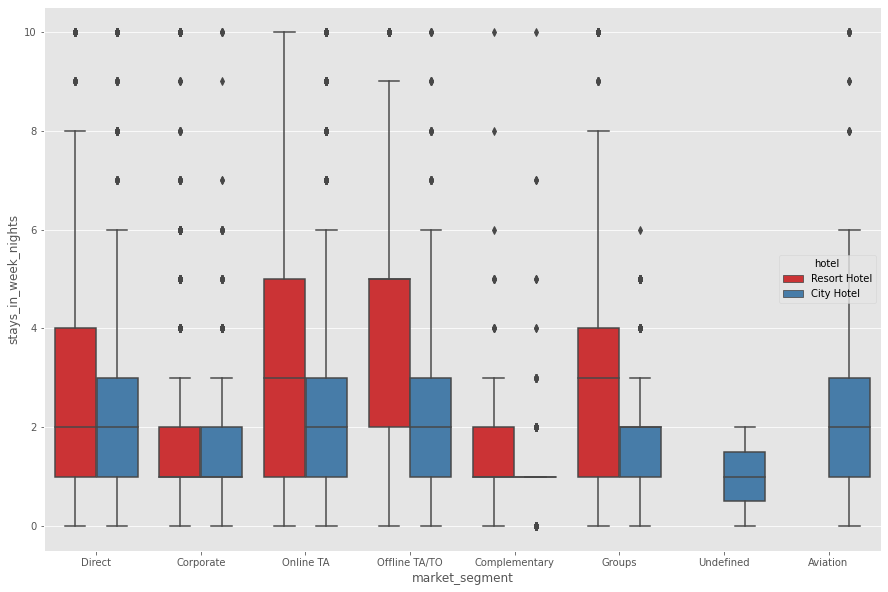

In [469]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = 'Set1');

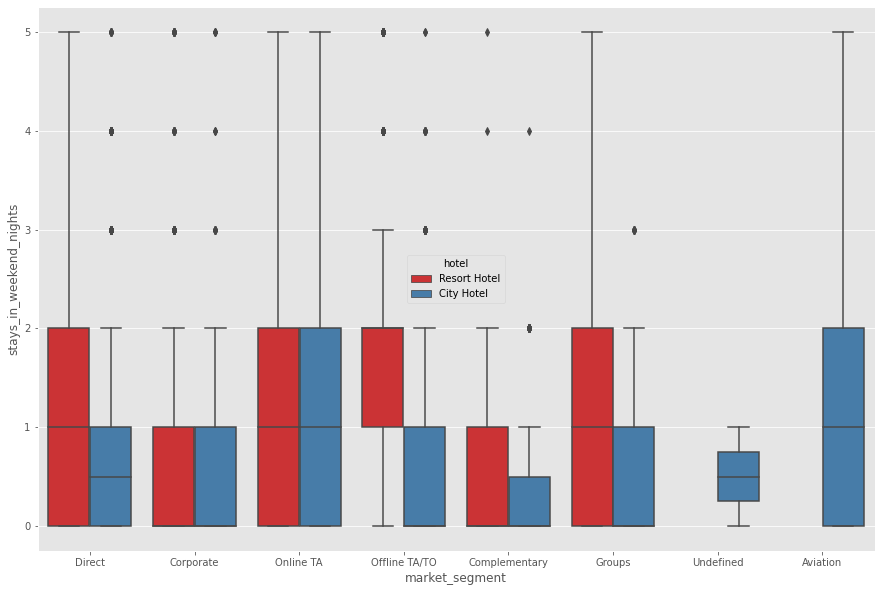

In [470]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = 'Set1');


# Lead time of market segment lead time

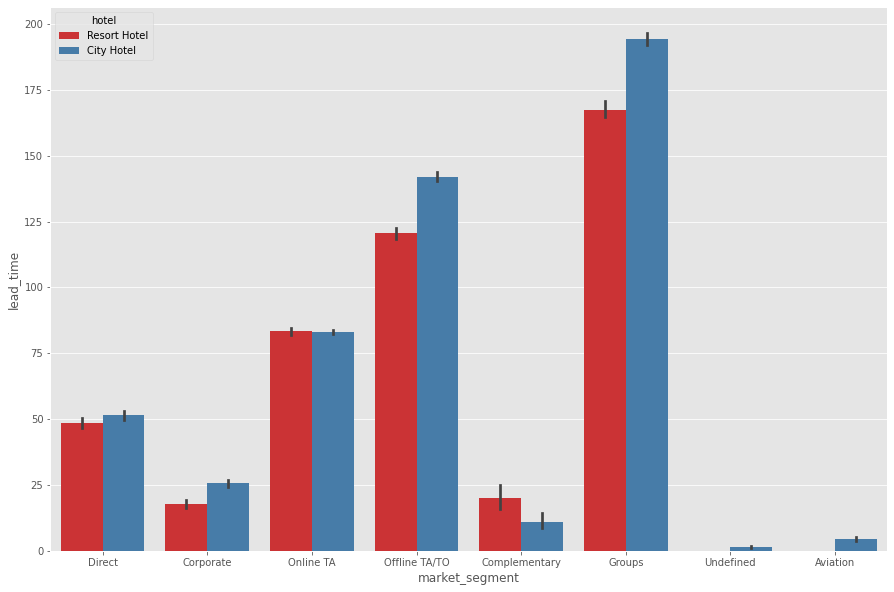

In [471]:
plt.figure(figsize=(15,10))
sns.barplot(x = "market_segment", y = "lead_time", data = data, hue = "hotel", palette = 'Set1');


In [472]:
data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Top 10 countries to focus on

In [473]:
 mask = data['country'].value_counts().index
 clrs = ['black' if (x in mask[:15]) else 'orange' for x in mask]

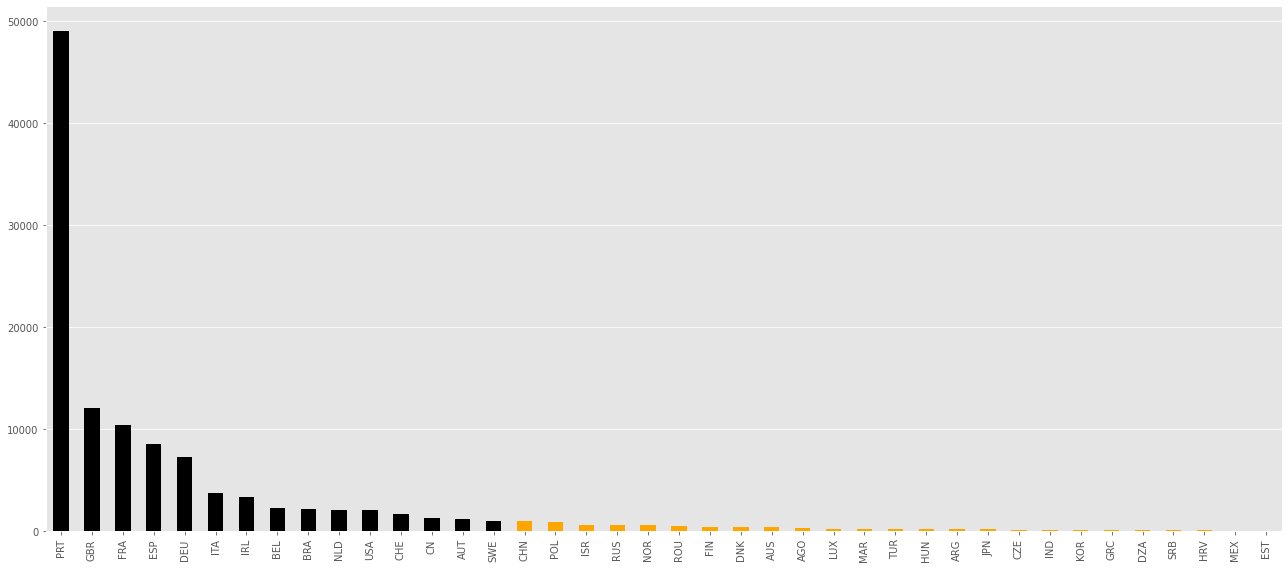

In [474]:
# top 10 countries to focus on
data['country'].value_counts()[:40].plot(kind='bar',figsize = (18,8),color=clrs);
plt.grid(axis = 'x')
plt.tight_layout()

# Top months to focus on

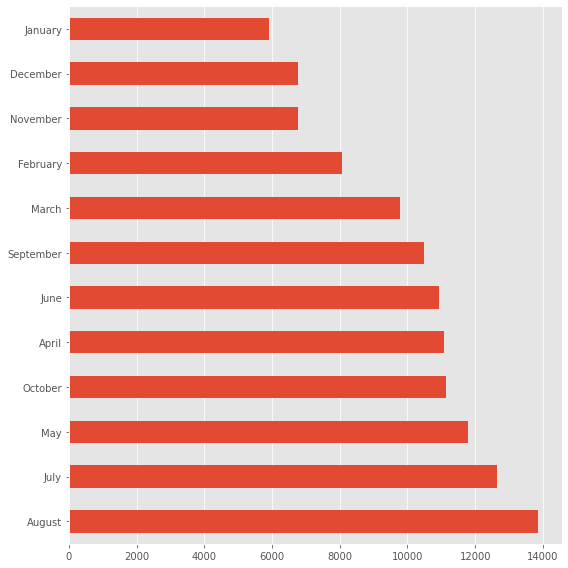

In [475]:

data['arrival_date_month'].value_counts().plot(kind='barh',figsize = (8,8));
plt.grid(axis = 'y')
plt.tight_layout()


Most guests visit in August, July,May,June,April and least in November,December,January 

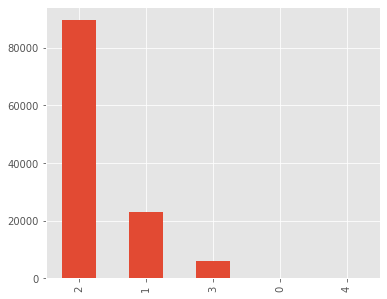

In [476]:
data['adults'].value_counts().plot(kind='bar',figsize = (6,5));


my questions 
1. What is the avg lead time of different customers?✔️
2. How long do people stay at the hotels?✔️   
3. Did customer get reserved room type 
4. What is the booking ratio between a resort hotel and a city hotel?✔️







In [477]:
# fig, ax1 = plt.subplots(figsize=(12,6))

# sns.lineplot(data = df['y_var_1'], marker='o', sort = False, ax=ax1)
# ax2 = ax1.twinx()

# sns.barplot(data = df, x='x_var', y='y_var_2', alpha=0.5, ax=ax2)

In [478]:
a =data[['reserved_room_type','assigned_room_type']].value_counts()

In [479]:
pd.set_option('display.max_rows', 100)

In [480]:
b = data.groupby('reserved_room_type')['assigned_room_type']

<BarContainer object of 9 artists>

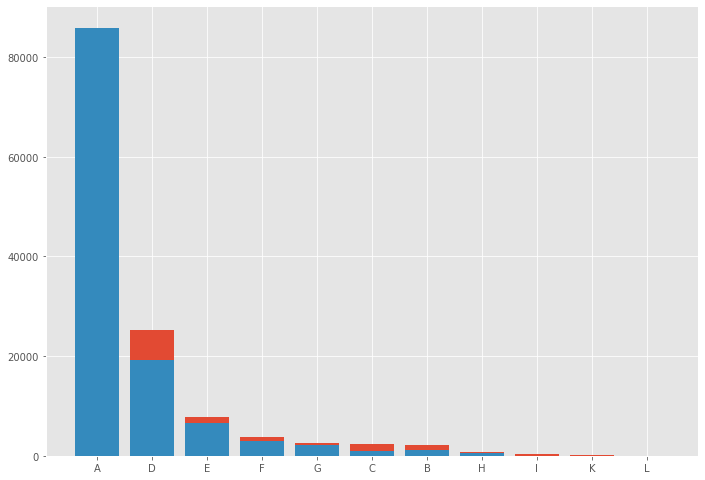

In [481]:
plt.bar(x=data['assigned_room_type'].value_counts().index,height=data['assigned_room_type'].value_counts().values)
plt.bar(x=data['reserved_room_type'].value_counts().index,height=data['reserved_room_type'].value_counts().values)

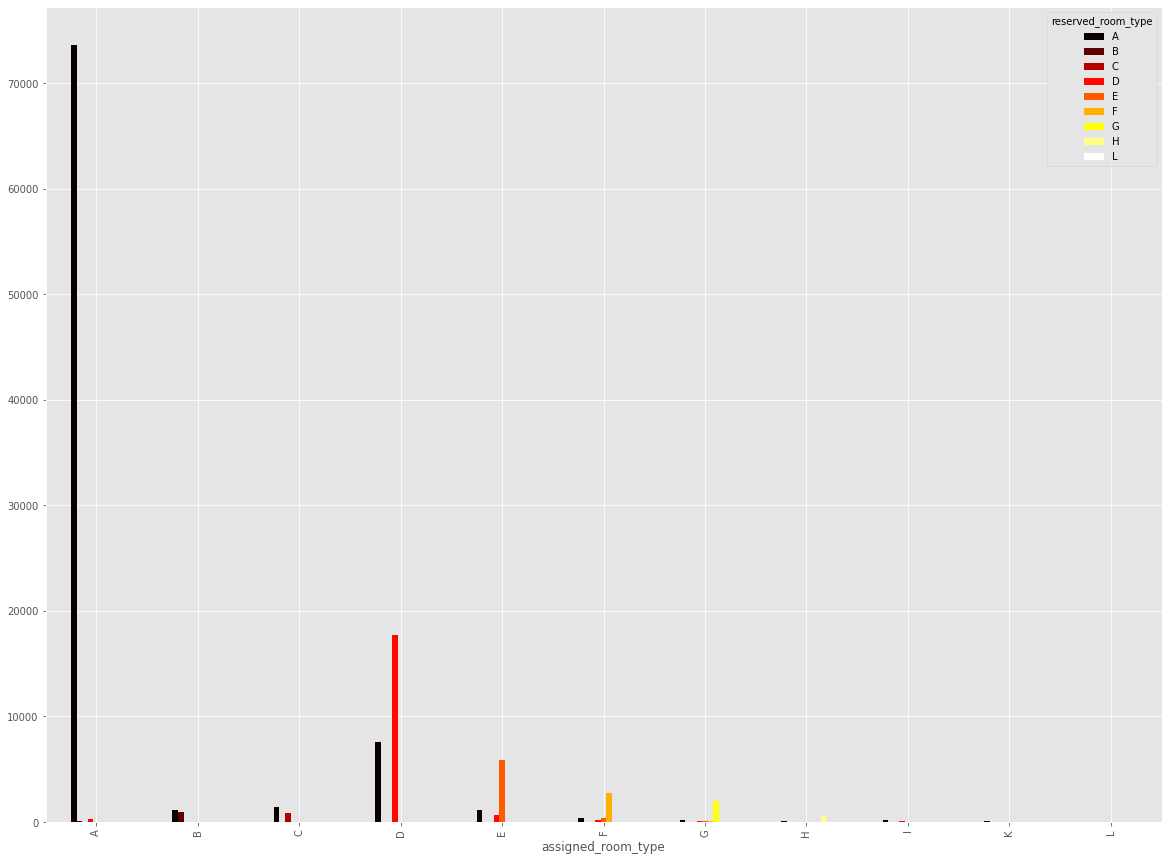

In [513]:
pd.crosstab(data['assigned_room_type'],data['reserved_room_type']).plot(figsize=(20,15),kind="bar",stacked=False,colormap='')

In [518]:
pd.crosstab(data['assigned_room_type'],data['reserved_room_type'])

reserved_room_type,A,B,C,D,E,F,G,H,L
assigned_room_type,,,,,,,,,
A,73566,111,5,311,15,6,5,0,1
B,1121,986,2,27,2,14,1,0,1
C,1444,0,882,33,8,0,2,0,1
D,7540,5,6,17731,22,4,0,1,0
E,1155,2,4,686,5916,31,4,0,0
F,417,2,2,204,404,2707,14,0,1
G,183,8,10,82,99,116,2041,10,0
H,94,0,10,9,4,3,7,584,1
I,211,0,10,67,40,10,15,6,0
